In [1]:
from sympy import *
%init_sympy_printing

## 数学表达式

### 符号

In [2]:
print((var("x0,y0,x1,y1")))

(x0, y0, x1, y1)


In [3]:
%C type(x0); x0.name; type(x0.name)

        type(x0)          x0.name  type(x0.name)
------------------------  -------  -------------
sympy.core.symbol.Symbol  'x0'     str          


In [4]:
x1, y1 = symbols("x1, y1")
type(x1)

sympy.core.symbol.Symbol

In [5]:
x2 = Symbol("x2")

In [6]:
t = x0
a, b = symbols("alpha, beta")
sin(a) + sin(b) + t

In [7]:
m, n = symbols("m, n", integer=True)
x = Symbol("x", positive=True)   

In [8]:
%omit 4 [attr for attr in dir(x) if attr.startswith("is_") and attr.lower() == attr]

['is_algebraic',
 'is_algebraic_expr',
 'is_antihermitian',
 'is_bounded',
...


In [31]:
%C x.is_Symbol; x.is_positive; x.is_imaginary; x.is_complex 

x.is_Symbol  x.is_positive  x.is_imaginary  x.is_complex
-----------  -------------  --------------  ------------
True         True           False           True        


In [9]:
%col 3 x.assumptions0

{'commutative': True,     'complex': True,         'hermitian': True,      
 'imaginary': False,      'negative': False,       'nonnegative': True,    
 'nonpositive': False,    'nonzero': True,         'positive': True,       
 'real': True,            'zero': False}          


In [36]:
Symbol.mro()

[sympy.core.symbol.Symbol,
 sympy.core.expr.AtomicExpr,
 sympy.core.basic.Atom,
 sympy.core.expr.Expr,
 sympy.logic.boolalg.Boolean,
 sympy.core.basic.Basic,
 sympy.core.evalf.EvalfMixin,
 object]

### 数值

In [37]:
%C 1/2 + 1/3; S(1)/2 + 1/S(3) 

1/2 + 1/3  S(1)/2 + 1/S(3)
---------  ---------------
0          5/6            


In [38]:
type(S(5)/6)

sympy.core.numbers.Rational

In [39]:
Rational(5, 10) # 有理数会自动进行约分处理

In [40]:
print((N(0.1, 60)))
print((N(10000.1, 60)))

0.100000000000000005551115123125782702118158340454101562500000
10000.1000000000003637978807091712951660156250000000000000000


In [51]:
print((N(Float(0.1, 60), 60))) #用浮点数创建Real对象时，精度和浮点数相同
print((N(Float("0.1", 60), 60))) #用字符串创建Real对象时，所指定的精度有效
print((N(Float("0.1", 60), 65))) #精度再高，也不是完全精确的

0.100000000000000005551115123125782702118158340454101562500000
0.100000000000000000000000000000000000000000000000000000000000
0.099999999999999999999999999999999999999999999999999999999999996111


In [10]:
print((N(pi, 50)))
print((N(sqrt(2), 50)))

3.1415926535897932384626433832795028841971693993751
1.4142135623730950488016887242096980785696718753769


### 运算符和函数

In [11]:
var("x, y, z")
Add(x, y, z)

In [63]:
Add(Mul(x, y, z), Pow(x, y), sin(z))

In [65]:
x*y*z + x**y + sin(z)

In [71]:
t = x - y
%C t.func; t.args; t.args[0].func; t.args[0].args

      t.func         t.args    t.args[0].func    t.args[0].args
------------------  -------  ------------------  --------------
sympy.core.add.Add  (-y, x)  sympy.core.mul.Mul  (-1, y)       


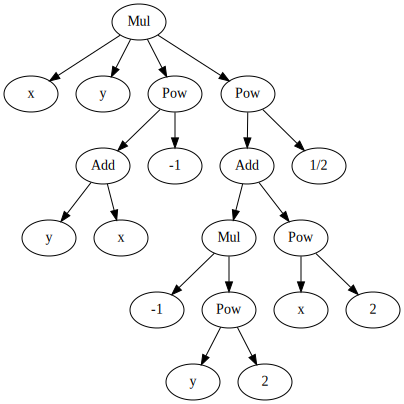

In [237]:
#%fig=表达式的树状结构
from sympy.printing.dot import dotprint
graph = dotprint(x * y * sqrt(x ** 2 - y ** 2) / (x + y))
%dot -f svg graph

In [85]:
f = Function("f")

In [90]:
issubclass(f, Function)

True

In [92]:
t = f(x, y)
%C type(t); t.func; t.args

type(t)  t.func  t.args
-------  ------  ------
f        f       (x, y)


In [93]:
t + t * t

### 通配符

> **TIP**

> 执行SymPy提供的`init_printing()`可以使用数学符号显示运算结果。但它会将Python的内置对象也转换成LateX显示。为了编写方便，本书使用一般文本显示内置对象，而用本书提供的`%sympy_latex`魔法方法将内置对象转换为LaTeX。

In [3]:
x, y = symbols("x, y")
a = Wild("a")
b = Wild("b")
%sympy_latex (3 * x * (x + y)**2).match(a * b**2)

In [5]:
expr = expand((x + y)**3)
%sympy_latex expr
%sympy_latex expr.find(a * b**2)

In [9]:
def find_match(expr, pattern):
    return [e.match(pattern) for e in expr.find(pattern)]

#%hide
def display_match_table(expr, pattern):
    from IPython.display import display_markdown, Markdown
    from scpy2.utils import tabulate_it
    
    def f(row, col):
        if col == "表达式":
            return "${}$".format(latex(row[0]))
        else:
            return "${}$".format(latex(row[1]))

    c1 = expr.find(pattern)
    c2 = find_match(expr, pattern)
    display_markdown(
        Markdown(tabulate_it(list(zip(c1, c2)), 
                 ["表达式", "匹配结果"], f, row_label=False)))
   
display_match_table(expr, a * b**2)
#%show
find_match(expr, a * b**2);

| **表达式**                                 | **匹配结果**                                                                          |
|:----------------------------------------|:----------------------------------------------------------------------------------|
| $3 x y^{2}$                             | $\left \{ a : 3 x, \quad b : y\right \}$                                          |
| $2$                                     | $\left \{ a : 1, \quad b : \sqrt{2}\right \}$                                     |
| $3$                                     | $\left \{ a : 1, \quad b : \sqrt{3}\right \}$                                     |
| $y$                                     | $\left \{ a : 1, \quad b : \sqrt{y}\right \}$                                     |
| $x$                                     | $\left \{ a : 1, \quad b : \sqrt{x}\right \}$                                     |
| $x^{3} + 3 x^{2} y + 3 x y^{2} + y^{3}$ | $\left \{ a : 1, \quad b : \sqrt{x^{3} + 3 x^{2} y + 3 x y^{2} + y^{3}}\right \}$ |
| $x^{3}$                                 | $\left \{ a : 1, \quad b : x^{\frac{3}{2}}\right \}$                              |
| $3 x^{2} y$                             | $\left \{ a : 3 y, \quad b : x\right \}$                                          |
| $y^{2}$                                 | $\left \{ a : 1, \quad b : y\right \}$                                            |
| $y^{3}$                                 | $\left \{ a : 1, \quad b : y^{\frac{3}{2}}\right \}$                              |
| $x^{2}$                                 | $\left \{ a : 1, \quad b : x\right \}$                                            |

In [10]:
a = Wild("a", exclude=[1])
b = Wild("b", exclude=[1, Pow])
#%hide
display_match_table(expr, a*b**2)
#%show
find_match(expr, a * b**2);

| **表达式**     | **匹配结果**                                 |
|:------------|:-----------------------------------------|
| $3 x y^{2}$ | $\left \{ a : 3 x, \quad b : y\right \}$ |
| $3 x^{2} y$ | $\left \{ a : 3 y, \quad b : x\right \}$ |
| $y^{3}$     | $\left \{ a : y, \quad b : y\right \}$   |
| $x^{3}$     | $\left \{ a : x, \quad b : x\right \}$   |

In [11]:
expr.replace(a * b**2, (a + b)**2)

In [25]:
expr = sqrt(x) / sin(y**2) + abs(exp(x) * x)
#%hide
display_match_table(expr, f)
#%show
find_match(expr, f);

| **表达式**                            | **匹配结果**                                                                                              |
|:-----------------------------------|:------------------------------------------------------------------------------------------------------|
| $e^{x}$                            | $\left \{ \operatorname{WildFunction}{\left (f \right )} : e^{x}\right \}$                            |
| $\sin{\left (y^{2} \right )}$      | $\left \{ \operatorname{WildFunction}{\left (f \right )} : \sin{\left (y^{2} \right )}\right \}$      |
| $\left\lvert{x e^{x}}\right\rvert$ | $\left \{ \operatorname{WildFunction}{\left (f \right )} : \left\lvert{x e^{x}}\right\rvert\right \}$ |